In [ ]:
#importing file to colab

#given = Training set_HMM.txt

from google.colab import files 
uploaded = files.upload()

Saving Training set_HMM.txt to Training set_HMM (1).txt


In [ ]:
#install nltk to colab

!pip install nltk

In [ ]:
#import necessary libraries

import nltk
from nltk.tokenize import word_tokenize
import re
import pprint
import time
from collections import Counter
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import requests
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# 2 functions to read the corpus
  # One function is to open the file and read the corpus. 
  # The other function is to read tagged sentences

def read_tag_sent(f):       # 'f' argument is passed from the below function definition
    line = f.readline()     #reading each line
    if not line:            # blank line denotes a complete sentence
        return None
    sent = []
    while line and (line != '\n'):
        line = line.strip()
        word,tag = line.split('\t', 2)       # each line in the input file has a tag set (word, tag)
        sent.append((word, tag))             # adding tagged words of each sentence
        line = f.readline()
    return sent

def read_tag_corp(filename):
    sents = []
    with open(filename, encoding='utf-8') as f:     # opening the file to read it in 'f' and passed to the previous function defined
        sent = read_tag_sent(f)
        while sent:
            sents.append(sent)
            sent = read_tag_sent(f)
    return sents

data = read_tag_corp('Training set_HMM.txt')       #calling the second function and storing the values/data

print("The given TAGGED dataset =", data)
print("\nThe first 10 sentences of the given data set =", data[:10])

The given TAGGED dataset = [[('i', 'PRP'), ("'d", 'MD'), ('like', 'VB'), ('to', 'TO'), ('go', 'VB'), ('to', 'IN'), ('a', 'DT'), ('fancy', 'JJ'), ('restaurant', 'NN'), ('.', '.')], [('i', 'PRP'), ("'d", 'MD'), ('like', 'VB'), ('french', 'JJ'), ('food', 'NN'), ('.', '.')], [('next', 'JJ'), ('thursday', 'NN'), ('.', '.')], [('next', 'JJ'), ('thursday', 'NN'), ('.', '.')], [('dinner', 'NN'), ('.', '.')], [('i', 'PRP'), ('want', 'VBP'), ('to', 'TO'), ('eat', 'VB'), ('french', 'JJ'), ('food', 'NN'), ('.', '.')], [('i', 'PRP'), ('want', 'VBP'), ('to', 'TO'), ('have', 'VB'), ('dinner', 'NN'), ('.', '.')], [('it', 'PRP'), ('can', 'MD'), ('be', 'VB'), ('really', 'RB'), ('expensive', 'JJ'), ('.', '.')], [('as', 'RB'), ('far', 'RB'), ('away', 'RB'), ('as', 'IN'), ('we', 'PRP'), ('can', 'MD'), ('get', 'VB'), ('.', '.')], [('as', 'RB'), ('far', 'RB'), ('away', 'RB'), ('as', 'IN'), ('we', 'PRP'), ('can', 'MD'), ('get', 'VB'), ('.', '.')], [('as', 'RB'), ('far', 'RB'), ('away', 'RB'), ('as', 'IN'), ('

In [ ]:
# split the given data into training and validation/testing set in the ratio 98:2

# NOTE- due to high execution time constraint, the testing set size was kept low

train_set, test_set = train_test_split(data, train_size=0.98, test_size=0.02, random_state = 42, shuffle=True) 
#splitting was done randomly through shuffling for better results

print("The length of the TRAIN-TAGGED dataset =", len(train_set))
print("The first 10 sentences of the TRAIN-TAGGED dataset =", train_set[:10])

print("\nThe length of the TEST-TAGGED dataset =", len(test_set))
print("The first 10 sentences of the TEST-TAGGED dataset =", test_set[:10])

The length of the TRAIN-TAGGED dataset = 15396
The first 10 sentences of the TRAIN-TAGGED dataset = [[('well', 'UH'), ('tell', 'VB'), ('me', 'PRP'), ('if', 'IN'), ('you', 'PRP'), ('like', 'VBP'), ('oriental', 'JJ'), ('food', 'NN'), ('to', 'TO'), ('go', 'VB'), ('.', '.')], [('is', 'VBZ'), ('the', 'DT'), ('distance', 'NN'), ('walking', 'VBG'), ('distance', 'NN'), ('or', 'CC'), ('distance', 'NN'), ('by', 'IN'), ('car', 'NN'), ('.', '.')], [('uh', 'UH'), ('something', 'NN'), ('closer', 'JJR'), ('to', 'IN'), ('icsi', 'NN'), ('.', '.')], [('i', 'PRP'), ('want', 'VBP'), ('to', 'TO'), ('go', 'VB'), ('for', 'IN'), ('dinner', 'NN'), ('.', '.')], [('okay', 'UH'), ('howbout', 'NN'), ('north', 'NN'), ('african', 'NN'), ('are', 'VBP'), ('there', 'EX'), ('any', 'DT'), ('north', 'NN'), ('african', 'JJ'), ('restaurants', 'NNS'), ('.', '.')], [('i', 'PRP'), ("'d", 'MD'), ('like', 'VB'), ('to', 'TO'), ('go', 'VB'), ('for', 'IN'), ('chinese', 'JJ'), ('food', 'NN'), ('.', '.')], [('twenty', 'CD'), ('minute

In [ ]:
# *************NOW working on TRAIN-TAGGED dataset i.e. train_set**********************************

#REPRESENTATIONS
# . ---> it represents the START of a sentence
# $ ---> it represents the END of the sentence

#tagged words from train set
#extracting tagged words through each sentence using for loop and storing them in a new list
train_tagged_words = [(word,tag) for sent in train_set for word,tag in sent]

# to find the number of tags in the TRAIN dataset
tags_in_train = set([tag for word,tag in train_tagged_words])
print("Count of TAGS in the TRAIN dataset =", len(tags_in_train))
print("TAGS =", tags_in_train)

#to find tagged words in TRAIN dataset
print("\nCount of TAGGED words in TRAIN dataset =", len(train_tagged_words))
print("TAGGED words in TRAIN dataset =", train_tagged_words)

# to find tokens in the TRAIN dataset
tokens_in_train = [word for word,tag in train_tagged_words]
print("\nCount of ALL tokens in the TRAIN dataset =", len(tokens_in_train))
print("The first 10 tokens of the TRAIN dataset =", tokens_in_train[:10])

# to find unique tokens in the TRAIN dataset
unique_tokens_in_train = set(tokens_in_train)
print("\nCount of UNIQUE tokens in the TRAIN dataset =", len(unique_tokens_in_train))
print("The first 10 unique tokens of the TRAIN dataset =", tokens_in_train[:10])

Count of TAGS in the TRAIN dataset = 36
TAGS = {'VB', 'RBR', 'PRP$', 'PRP', 'RP', 'DT', 'VBG', 'NNS', 'VBZ', 'RB', 'TO', 'WDT', 'WRB', 'VBN', 'JJR', '.', 'NN', 'LS', 'CD', 'VBD', 'IN', 'JJ', 'FW', 'PDT', 'HYPH', 'EX', 'POS', 'RBS', 'NNP', 'UH', 'VBP', 'WP', ':', 'MD', 'CC', 'JJS'}

Count of TAGGED words in TRAIN dataset = 146948
TAGGED words in TRAIN dataset = [('well', 'UH'), ('tell', 'VB'), ('me', 'PRP'), ('if', 'IN'), ('you', 'PRP'), ('like', 'VBP'), ('oriental', 'JJ'), ('food', 'NN'), ('to', 'TO'), ('go', 'VB'), ('.', '.'), ('is', 'VBZ'), ('the', 'DT'), ('distance', 'NN'), ('walking', 'VBG'), ('distance', 'NN'), ('or', 'CC'), ('distance', 'NN'), ('by', 'IN'), ('car', 'NN'), ('.', '.'), ('uh', 'UH'), ('something', 'NN'), ('closer', 'JJR'), ('to', 'IN'), ('icsi', 'NN'), ('.', '.'), ('i', 'PRP'), ('want', 'VBP'), ('to', 'TO'), ('go', 'VB'), ('for', 'IN'), ('dinner', 'NN'), ('.', '.'), ('okay', 'UH'), ('howbout', 'NN'), ('north', 'NN'), ('african', 'NN'), ('are', 'VBP'), ('there', 'EX'

In [ ]:
t = len(tags_in_train)
u = len(unique_tokens_in_train)

In [88]:
# ****************Create a POS Tagging Algorithm - HIDDEN MARKOV MODEL*************************************

# Dataset to operate on- TRAIN-TAGGED dataset

## Assumptions- present tag will depend only on the previous tag. 
#             - P(tag|start) = P(tag|'.')

#Tasks- Calculate Transition Probability: P(state2|state1)
#     - Calculate Emission Probabaility: P(observation|state)
#     - to assign higly probable tag to a word
#     - to maximize the likelihood of P(tag/word)
#     - P(tag/word) = P(word/tag). P(tag) / P(word) 
#     - nullify P(word)
#     - calculate P(word/tag) and P(tag)
#     - P(word/tag) = count(word, tag) / count(tag).

In [83]:
# Calculate the P(word/tag): Emission Probability
# P(word/tag) = (count of word w tagged with tag t in the corpus) / (count of tag t appearing in the corpus)

def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [(w,t) for w,t in train_bag if t==tag]
    count_tag = len(tag_list) # the count of tag t present in the corpus
    w_given_tag_list = [w for w,t in tag_list if w==word] # the list of word w with the tag t present in the corpus
    count_word_given_tag = len(w_given_tag_list) # the count of word w with the tag t in the corpus
    
    return (count_word_given_tag, count_tag)     # returns the counts of tags and tagged words

In [93]:
# Calculate the tag given tag i.e. P(tag2/tag1): Transition Probability

##method- Maximum Likelihood Estimation (MLE)

# P(tag2/tag1) = ( count of tag1 is followed by tag2)/ (count of tag1 appearing in corpus)

#function to count the tags and tag(given a tag)
def tag2_given_tag1(tag2, tag1, train_bag = train_tagged_words):
    tags = [t for w,t in train_bag]                # all the tags from TRAIN dataset
    count_tag1 = len([t for t in tags if t==tag1]) # count of tag1 appearing in the corpus
    count_tag2_tag1 = 0                            # count of tag2 given tag1 
    for index in range(len(tags)-1):
        if tags[index]==tag1 and tags[index+1] == tag2:
            count_tag2_tag1 += 1                   # count if tag1 is followed by tag2
    return (count_tag2_tag1, count_tag1)

#function to calculate the P(tag2/tag1)
def tag2_given_tag1_prob(tag2,tag1,train_bag = train_tagged_words):
    count_tag2_tag1, count_tag1 = tag2_given_tag1(tag2,tag1,train_bag)
    return count_tag2_tag1/count_tag1


# checking the function through call with random examples
print("EXAMPLES to check-")
print(tag2_given_tag1(',', 'NNP'))
print(tag2_given_tag1('NN', '.'))
print(tag2_given_tag1('PRP', 'PRP'))
print(tag2_given_tag1('NNP', 'VB'))

EXAMPLES to check-
(0, 724)
(716, 15396)
(80, 12671)
(28, 14198)


In [95]:
# creating tag X tag matrix of tags for it's Transition Probabilities
# ROW = tag1, COLUMN = tag2

# M(i, j) == P(tag at j given tag at i)

#t = len(tags_in_train)
#u = len(unique_tokens_in_train)

tags_matrix = np.zeros((len(tags_in_train), len(tags_in_train)), dtype='float32')
for i, tag1 in enumerate(list(tags_in_train)): 
    for j, tag2 in enumerate(list(tags_in_train)): 
        tags_matrix[i, j] = tag2_given_tag1(tag2, tag1)[0]/tag2_given_tag1(tag2, tag1)[1]

# convert the Transition Probabilities matrix into a dataframe 
tags_matrix_dataframe = pd.DataFrame(tags_matrix, columns = list(tags_in_train), index=list(tags_in_train))
tags_matrix_dataframe

VB       RBR      PRP$  ...        MD        CC       JJS
VB    0.002606  0.000916  0.000916  ...  0.000916  0.006832  0.000845
RBR   0.000000  0.000000  0.000000  ...  0.000000  0.014218  0.000000
PRP$  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
PRP   0.148212  0.025886  0.000000  ...  0.272275  0.000710  0.000000
RP    0.008290  0.000000  0.000000  ...  0.000000  0.014508  0.000000
DT    0.001076  0.002870  0.000000  ...  0.007057  0.000000  0.021887
VBG   0.000000  0.000000  0.003033  ...  0.000000  0.000000  0.000000
NNS   0.002252  0.000000  0.000000  ...  0.001386  0.044179  0.000000
VBZ   0.015171  0.001264  0.002107  ...  0.000000  0.000000  0.004635
RB    0.163297  0.001189  0.000000  ...  0.006627  0.005607  0.000000
TO    0.938711  0.000000  0.000000  ...  0.000000  0.000000  0.000000
WDT   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
WRB   0.015986  0.000000  0.000000  ...  0.148313  0.000000  0.000000
VBN   0.002571  0.000000  0.000000  ...  0.000000  0.012853  0.000000
JJR   0.000000  0.000000  0.000000  ...  0.004248  0.000000  0.009709
.     0.117953  0.000195  0.000909  ...  0.036893  0.001559  0.000585
NN    0.004857  0.001140  0.000000  ...  0.016344  0.048059  0.000000
LS    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
CD    0.000000  0.000000  0.000000  ...  0.000000  0.047666  0.000000
VBD   0.024779  0.000000  0.008850  ...  0.012389  0.000000  0.000000
IN    0.001696  0.001002  0.010945  ...  0.000000  0.000000  0.007785
JJ    0.000000  0.000000  0.000000  ...  0.001029  0.033706  0.001158
FW    0.002809  0.000000  0.000000  ...  0.000000  0.000000  0.000000
PDT   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
HYPH  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
EX    0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
POS   0.021649  0.000000  0.000000  ...  0.000000  0.005155  0.000000
RBS   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
NNP   0.000000  0.000000  0.000000  ...  0.000000  0.117403  0.000000
UH    0.142302  0.000971  0.007771  ...  0.017241  0.009228  0.001214
VBP   0.001215  0.000000  0.002256  ...  0.003297  0.000000  0.000000
WP    0.000000  0.000000  0.000000  ...  0.023098  0.000000  0.000000
:     0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
MD    0.795014  0.000000  0.000000  ...  0.000824  0.000000  0.000000
CC    0.021609  0.000000  0.018391  ...  0.010115  0.004598  0.000000
JJS   0.000000  0.000000  0.000000  ...  0.022727  0.000000  0.017045

[36 rows x 36 columns]

In [99]:
#About the Transition Probability matrix

"""mostly SPARSE since each tag will not be seen with most tags ever, and those terms will be equal to 0."""

print("Shape of the Transition Probability matrix =", tags_matrix_dataframe.shape)
print("\nProbability of tags when apprearing at the start of a sentence =\n", tags_matrix_dataframe.loc['.', :])

Shape of the Transition Probability matrix = (36, 36)

Probability of tags when apprearing at the start of a sentence =
 VB      0.117953
RBR     0.000195
PRP$    0.000909
PRP     0.351650
RP      0.000909
DT      0.048129
VBG     0.001364
NNS     0.003248
VBZ     0.026955
RB      0.039751
TO      0.003637
WDT     0.009418
WRB     0.054170
VBN     0.000000
JJR     0.006105
.       0.000065
NN      0.046506
LS      0.000585
CD      0.013250
VBD     0.003118
IN      0.015848
JJ      0.019031
FW      0.002143
PDT     0.000260
HYPH    0.000000
EX      0.000455
POS     0.000000
RBS     0.000000
NNP     0.001754
UH      0.115290
VBP     0.044232
WP      0.033970
:       0.000000
MD      0.036893
CC      0.001559
JJS     0.000585
Name: ., dtype: float32


Tags having prob of occurence is >=0.5 in the TRAIN dataset =
             VB  RBR  PRP$  PRP  RP        DT  VBG  ...  UH  VBP  WP   :  MD  CC  JJS
VB         NaN  NaN   NaN  NaN NaN       NaN  NaN  ... NaN  NaN NaN NaN NaN NaN  NaN
RBR        NaN  NaN   NaN  NaN NaN       NaN  NaN  ... NaN  NaN NaN NaN NaN NaN  NaN
PRP$       NaN  NaN   NaN  NaN NaN       NaN  NaN  ... NaN  NaN NaN NaN NaN NaN  NaN
PRP        NaN  NaN   NaN  NaN NaN       NaN  NaN  ... NaN  NaN NaN NaN NaN NaN  NaN
RP         NaN  NaN   NaN  NaN NaN       NaN  NaN  ... NaN  NaN NaN NaN NaN NaN  NaN
DT         NaN  NaN   NaN  NaN NaN       NaN  NaN  ... NaN  NaN NaN NaN NaN NaN  NaN
VBG        NaN  NaN   NaN  NaN NaN       NaN  NaN  ... NaN  NaN NaN NaN NaN NaN  NaN
NNS        NaN  NaN   NaN  NaN NaN       NaN  NaN  ... NaN  NaN NaN NaN NaN NaN  NaN
VBZ        NaN  NaN   NaN  NaN NaN       NaN  NaN  ... NaN  NaN NaN NaN NaN NaN  NaN
RB         NaN  NaN   NaN  NaN NaN       NaN  NaN  ... NaN  NaN NaN NaN NaN NaN  NaN
TO

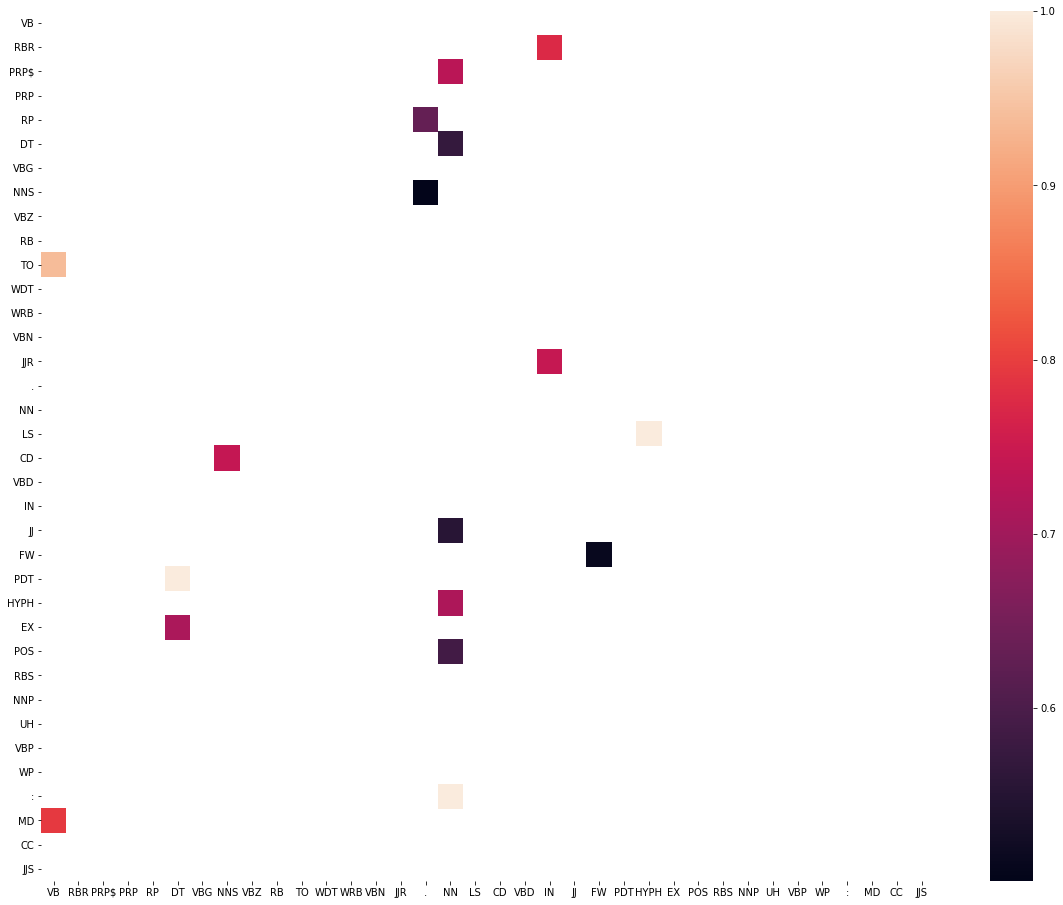

In [107]:
# to check for frequent tags occuring in the TRAIN dataset

frequent_tags = tags_matrix_dataframe[tags_matrix_dataframe >= 0.5]   #tags having prob of occurence is >=0.5 
print("Tags having prob of occurence is >=0.5 in the TRAIN dataset =\n", frequent_tags)

plt.figure(figsize=(20, 16))
sns.heatmap(frequent_tags)
plt.show()

In [109]:
# ****************Create a Viterbi Algorithm**************************************************************
# ****************Create a POS Tagging Algorithm - HIDDEN MARKOV MODEL*************************************

## Dataset to operate on- TRAIN-TAGGED dataset

## Assumptions- present tag will depend only on the previous tag. 
#             - P(tag|start) = P(tag|'.')

##method- Maximum Likelihood Estimation (MLE)

##Tasks- using P(word, tag) and P(tag2, tag1) assign tags to each word in the given document
#     - extract each word 
#     - calculate P(tag/word) = P(word/tag).P(tag) for each tag in the tag set
#     - then find the tag having the max P(tag/word)
#     - Create a Viterbi Heuristic using a function definiton- to calculate Transition, Emission and State probabilities

In [112]:
# Creating a Viterbi Heuristic using a function definiton 

## Purpose - training the model

def Viterbi(words, train_bag = train_tagged_words):
    state = [] #list of state/given tag for each word
    T = list(set([tag for word,tag in train_bag])) #list of tags in the corpus
    
    for index, word in enumerate(words):
        #list of probability column for a given observation
        # list of State probabilities for each state/given word in the corpus, for each word
        state_probalities = [] 
        for tag2 in T:
            if index == 0:
                transition_prob = tag2_given_tag1_prob(tag2, '.') # TRANSITION prob. for the start tag
            else:
                tag1 = state[-1]
                transition_prob = tag2_given_tag1_prob(tag2,tag1) # TRANSITION prob. of tag2_given_tag1
                
            # Calculate EMISSION and STATE probabilities
            emission_prob = word_given_tag(words[index], tag2)[0]/word_given_tag(words[index], tag2)[1]  # P(word|tag) 
            state_probalities.append(emission_prob * transition_prob) #adding to the list

        # Finding the STATE/TAG for which probability is MAXIMUM
        state_with_max_prob = T[state_probalities.index(max(state_probalities))] 
        state.append(state_with_max_prob) #adding to the list
    return list(zip(words, state))

In [122]:
# Validating/Evaluating Viterbi Algorithm 

## Dataset to be used = TEST dataset

#NOTE- TRAIN set : TEST set = 98 : 2
#    - TEST set is taken small due to huge execution time and collapsing of Colab notebook. 

print("TEST dataset = ", test_set)
print("Count of the TEST dataset = ",len(test_set))

random.seed(100000) #seed generator
# generating random numbers to select sentences from the TEST dataset
random_index = [random.randint(1,len(test_set)) for x in range(len(test_set))]
print("\nSorted view of Random indexes = ", sorted(random_index))
print("Lenght of Random Numbers generated = ",len(random_index))

# list to store the sentences from the TEST dataset using random_index generated above
test_base = [test_set[i] for i in random_index]
#print("\n", test_base)
#print("Lenght of the TEST-RUN set = ",len(test_base))

# to get the list of TAGGED words for the TEST dataset
test_runbase = [(word,tag) for sent in test_base for word,tag in sent]
print("\nTAGGED-TEST dataset=", test_runbase)
print("Count of the TAGGED-TEST dataset = ",len(test_runbase))

# to find the list of untagged words in the the TEST dataset
test_words = [word for word,tag in test_runbase] 
print("\nUNTAGGED-TEST dataset=", test_words)
print("Count of the TEST set WORDS = ",len(test_words))

TEST dataset =  [[('let', 'VB'), ("'s", 'PRP'), ('start', 'VB'), ('over', 'RP'), ('please', 'UH'), ('.', '.')], [('thai', 'DT'), ('food', 'NN'), ('.', '.')], [('it', 'PRP'), ('must', 'MD'), ('be', 'VB'), ('less', 'JJR'), ('than', 'IN'), ('ten', 'CD'), ('minutes', 'NNS'), ('away', 'RB'), ('.', '.')], [('what', 'WP'), ('about', 'IN'), ('for', 'IN'), ('lunch', 'NN'), ('.', '.')], [('i', 'PRP'), ('want', 'VBP'), ('to', 'TO'), ('eat', 'VB'), ('at', 'IN'), ('any', 'DT'), ('day', 'NN'), ('.', '.')], [('i', 'PRP'), ('like', 'VBP'), ('to', 'TO'), ('go', 'VB'), ('to', 'IN'), ('a', 'DT'), ('restaurant', 'NN'), ('on', 'IN'), ('sunday', 'NN'), ('.', '.')], [('how', 'WRB'), ('about', 'IN'), ('european', 'JJ'), ('food', 'NN'), ('for', 'IN'), ('dinner', 'NN'), ('.', '.')], [('i', 'PRP'), ('want', 'VBP'), ('restaurants', 'NNS'), ('with', 'IN'), ('mediterranean', 'JJ'), ('food', 'NN'), ('which', 'WDT'), ('are', 'VBP'), ('less', 'JJR'), ('than', 'IN'), ('ten', 'CD'), ('miles', 'NNS'), ('from', 'IN'), ('i

In [123]:
# tagging the TEST dataset sentences
start = time.time()
tagged_sequence = Viterbi(test_words)
end = time.time()
time_diff = end-start

In [129]:
#calculate the time take
print("Time taken (in seconds)=", time_diff)

#print predicted tags 
print("\nPREDICTED POS-taggers of the TEST dataset =", tagged_sequence)

#print wrongly predicted tags 
incorrect_tags = [(test_runbase[tagged_sequence.index(i)-1],i,j) for i, j in zip(tagged_sequence, test_runbase) if i != j] 
print("WRONG tags generated on the TEST dataset =", incorrect_tags)

#matching the results with TEST dataset
check = [(i,j) for i, j in zip(tagged_sequence, test_runbase) if i == j]   

#Finding the accuracy
accuracy = len(check)/len(tagged_sequence)
print("\nAccuracy on the TEST dataset =", accuracy)

Time taken (in seconds)= 8164.304625511169

PREDICTED POS-taggers of the TEST dataset = [('gramma', 'NN'), ("'s", 'POS'), ('inn', 'NN'), ('guerrero', 'NN'), ("'s", 'POS'), ('homemade', 'JJ'), ('cafe', 'NN'), ('hong', 'NN'), ('-', 'HYPH'), ('fu', 'NN'), ('hong', 'NN'), ('-', 'HYPH'), ('kong', 'VBG'), ('villa', 'NN'), ('.', '.'), ('i', 'PRP'), ("'d", 'MD'), ('like', 'VB'), ('to', 'TO'), ('have', 'VB'), ('dinner', 'NN'), ('at', 'IN'), ('sweet', 'JJ'), ("basil's", 'NNS'), ('.', '.'), ('what', 'WP'), ("'s", 'VBZ'), ('the', 'DT'), ('best', 'JJS'), ('chinese', 'JJ'), ('restaurant', 'NN'), ('near', 'IN'), ('icksee', 'NN'), ('.', '.'), ('fifteen', 'CD'), ('bucks', 'NNS'), ('.', '.'), ('show', 'VB'), ('me', 'PRP'), ('the', 'DT'), ('list', 'NN'), ('.', '.'), ('it', 'PRP'), ('could', 'MD'), ('be', 'VB'), ('more', 'JJR'), ('far', 'RB'), ('away', 'RB'), ('maybe', 'RB'), ('ten', 'CD'), ('minutes', 'NNS'), ('with', 'IN'), ('a', 'DT'), ('car', 'NN'), ('.', '.'), ('um', 'UH'), ('i', 'PRP'), ('would', 'M